<h1>Machine Learning for Weather Prediction using Australian Bureau of Meteorology Data</h1>

<p>Welcome to this machine learning notebook, where we will explore the fascinating world of weather prediction using data from the Australian Bureau of Meteorology. The dataset we'll be working with is sourced from the Bureau of Meteorology's "real-time" system, providing valuable observations on various weather parameters.</p>

<h2>Data Availability and Quality</h2>
<p>The observations in this dataset are primarily generated and managed automatically, with some degree of quality checking. Despite these efforts, it is essential to remain cautious as erroneous values may still appear. At times, certain observations might be missing due to various reasons. For example, missing daily maximum and minimum temperatures, rainfall, or evaporation values may lead to the next provided value being accumulated over several days instead of a single day. Detecting such cases reliably can be challenging for an automated system.</p>

<h2>Summary Statistics</h2>
<p>The summary statistics, including mean, lowest, highest, and total values, have been calculated using the available data at the time of preparation. Note that statistics are calculated only when it makes sense to do so. For instance, "total maximum temperature" and "mean maximum wind gust" are not calculated, while "total rainfall" and "mean minimum temperature" are included.</p>

<h2>Extreme Values</h2>
<p>In the dataset, extreme values for each field are indicated visually. The lowest value is shown in blue, and the highest value is shown in red. Additionally, for wind-related data, a hash mark (#) represents multiple occurrences of a certain wind speed from different directions. The direction of the highest (or lowest) wind speed is displayed, not the "highest" direction.</p>

<h2>Data Source and Updates</h2>
<p>The original source of the data is the Australian Government's Bureau of Meteorology. To access the latest data, you can visit <a href="http://www.bom.gov.au/climate/dwo/">Bureau of Meteorology Climate Data</a>. The dataset used here has additional columns such as 'RainToday,' and our target variable is 'RainTomorrow.' This information was gathered from the Rattle platform at <a href="https://bitbucket.org/kayontoga/rattle/src/master/data/weatherAUS.RData">Rattle Weather Data</a>.</p>

<p>In this notebook, we will employ machine learning techniques to analyze weather patterns and build a predictive model to forecast whether it will rain tomorrow based on various meteorological features. Let's dive into the world of data exploration, model training, and evaluation to gain valuable insights into weather prediction.</p>


<h1>Imports required libraries:</h1>
<p> pandas, scikit-learn, numpy, matplotlib, and sklearn.metrics.</p>
<p>Applies logistic regression, linear regression, k-nearest neighbors, decision tree, and SVM classifiers with grid search.</p>
<p>Computes evaluation metrics: Jaccard score, F1 score, and log loss.</p>
<p>Plots a confusion matrix and calculates accuracy.</p>


In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import sklearn.metrics as metrics

<h1>Data Loading and Initial Exploration</h1>
<p>Load weather data from a CSV file and examine the first few rows of the dataset.</p>


In [2]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillUp/labs/ML-FinalAssignment/Weather_Data.csv')

df.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2/1/2008,19.5,22.4,15.6,6.2,0.0,W,41,S,SSW,...,92,84,1017.6,1017.4,8,8,20.7,20.9,Yes,Yes
1,2/2/2008,19.5,25.6,6.0,3.4,2.7,W,41,W,E,...,83,73,1017.9,1016.4,7,7,22.4,24.8,Yes,Yes
2,2/3/2008,21.6,24.5,6.6,2.4,0.1,W,41,ESE,ESE,...,88,86,1016.7,1015.6,7,8,23.5,23.0,Yes,Yes
3,2/4/2008,20.2,22.8,18.8,2.2,0.0,W,41,NNE,E,...,83,90,1014.2,1011.8,8,8,21.4,20.9,Yes,Yes
4,2/5/2008,19.7,25.7,77.4,4.8,0.0,W,41,NNE,W,...,88,74,1008.3,1004.8,8,8,22.5,25.5,Yes,Yes


###Data Preprocessing: One-Hot Encoding and Binary Replacement
<p>Perform one-hot encoding on categorical columns 'RainToday', 'WindGustDir', 'WindDir9am', and 'WindDir3pm' using 'get_dummies()' function.</p>
<p>Replace binary categorical values 'No' and 'Yes' with 0 and 1 respectively using 'replace()' method.</p>

In [3]:
df_sydney_processed = pd.get_dummies(data=df, columns=['RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])
df_sydney_processed.replace(['No', 'Yes'], [0,1], inplace=True)

### Training Data and Test Data

In [4]:
df_sydney_processed.drop('Date',axis=1,inplace=True)
df_sydney_processed = df_sydney_processed.astype(float)
features = df_sydney_processed.drop(columns='RainTomorrow', axis=1)
Y = df_sydney_processed['RainTomorrow']

### Linear Regression

<h1>Data Splitting: Train-Test Split</h1>
<p>Split the 'features' and 'Y' data into training and testing sets using 'train_test_split()' function with a test size of 20% and random state set to 10.</p>


In [5]:
x_train, x_test, y_train, y_test = train_test_split(features,Y,test_size = 0.2, random_state = 10)
print('Train set:', x_train.shape, y_train.shape)
print('Test set:', x_test.shape, y_test.shape)

Train set: (2616, 66) (2616,)
Test set: (655, 66) (655,)


<h1>Model Training: Logistic Regression</h1>
<p>Train a Logistic Regression model named 'LinearReg' with regularization strength C=0.01 and the 'liblinear' solver using the training data 'x_train' and 'y_train'.</p>


In [6]:
LinearReg = LogisticRegression(C=0.01, solver='liblinear').fit(x_train,y_train)

<h1>Model Prediction</h1>
<p>Make predictions using the trained Logistic Regression model ('LinearReg') on the test data ('x_test'). The predicted values are stored in the 'predictions' variable.</p>


In [7]:
predictions = LinearReg.predict(x_test)

<h1>Evaluation Metrics: Linear Regression Model</h1>
<p>Compute evaluation metrics for the Linear Regression model.</p>
<p><b>Mean Absolute Error (MAE)</b>: Calculate the mean absolute error between the actual and predicted values.</p>
<p><b>Mean Squared Error (MSE)</b>: Calculate the mean squared error between the actual and predicted values.</p>
<p><b>R-squared (R2) Score</b>: Evaluate the goodness of fit of the model on the test data.</p>


In [8]:
from sklearn.metrics import r2_score
LinearRegression_MAE = np.mean(np.absolute(predictions - y_test))
LinearRegression_MSE = np.mean((predictions - y_test) ** 2)
LinearRegression_R2 = r2_score(y_test , predictions)
print(f"MAE = {LinearRegression_MAE} MSE = {LinearRegression_MSE} R2 = {LinearRegression_R2}")
print("Residual sum of squares: %.2f" %np.mean((predictions - y_test)**2))
print('Variance scor: %.2f' % LinearReg.score(x_train, y_train))

MAE = 0.15725190839694655 MSE = 0.15725190839694655 R2 = 0.2215337394996767
Residual sum of squares: 0.16
Variance scor: 0.84


###KNN

<h1>Model Training: K-Nearest Neighbors (KNN)</h1>
<p>Train a K-Nearest Neighbors (KNN) model named 'KNN' with 'n_neighbors' set to 4 using the training data 'x_train' and 'y_train'.</p>


In [9]:
KNN = KNeighborsClassifier(n_neighbors = 4).fit(x_train,y_train)

<h1>Model Prediction</h1>
<p>Make predictions using the trained K-Nearest Neighbors (KNN) model ('KNN') on the test data ('x_test'). The predicted values are stored in the 'predictions' variable.</p>


In [10]:
predictions = KNN.predict(x_test)

<h1>Evaluation Metrics: K-Nearest Neighbors (KNN) Model</h1>
<p>Compute evaluation metrics for the K-Nearest Neighbors (KNN) model.</p>
<p><b>Accuracy Score</b>: Calculate the accuracy of the model's predictions compared to the actual target values on the test data.</p>
<p><b>F1 Score</b>: Calculate the F1 score, which considers both precision and recall, for the KNN model's performance.</p>
<p><b>Jaccard Index</b>: Calculate the Jaccard index, which measures the similarity between predicted and actual classes.</p>

In [11]:
KNN_Accuracy_Score =accuracy_score(y_test,predictions)
KNN_JaccardIndex = jaccard_score(y_test,predictions)
KNN_F1_Score = f1_score(y_test,predictions)
print(f" accuracy score : {KNN_Accuracy_Score} , F1 score : {KNN_F1_Score} , jaccordindex: {KNN_JaccardIndex}")

 accuracy score : 0.8183206106870229 , F1 score : 0.5966101694915255 , jaccordindex: 0.4251207729468599


### Decision Tree

<h1>Model Training: Decision Tree Classifier</h1>
<p>Train a Decision Tree Classifier model named 'Tree' using the training data 'x_train' and 'y_train'.</p>


In [12]:
Tree = DecisionTreeClassifier().fit(x_train,y_train)

<h1>Model Prediction</h1>
<p>Make predictions using the trained Decision Tree Classifier model ('Tree') on the test data ('x_test'). The predicted values are stored in the 'predictions' variable.</p>

In [13]:
predictions = Tree.predict(x_test)

<h1>Evaluation Metrics: Decision Tree Classifier</h1>
<p>Compute evaluation metrics for the Decision Tree Classifier model.</p>
<p><b>Accuracy Score</b>: Calculate the accuracy of the model's predictions compared to the actual target values on the test data.</p>
<p><b>F1 Score</b>: Calculate the F1 score, which considers both precision and recall, for the Decision Tree model's performance.</p>
<p><b>Jaccard Index</b>: Calculate the Jaccard index, which measures the similarity between predicted and actual classes.</p>


In [14]:
Tree_Accuracy_Score = accuracy_score(y_test,predictions)
Tree_JaccardIndex = jaccard_score(y_test,predictions)
Tree_F1_Score = f1_score(y_test,predictions)
print(f"accuracy score : {Tree_Accuracy_Score} , jaccordindex : {Tree_JaccardIndex} , F1 score : {Tree_F1_Score}")

accuracy score : 0.7603053435114504 , jaccordindex : 0.4053030303030303 , F1 score : 0.5768194070080863


### Logistic Regression


<h1>Data Splitting: Train-Test Split</h1>
<p>Split the 'features' and 'Y' data into training and testing sets using 'train_test_split()' function with a test size of 20% and random state set to 1.</p>


In [15]:
x_train, x_test, y_train, y_test = train_test_split(features,Y,test_size=0.2,random_state=1)

<h1>Model Training: Logistic Regression</h1>
<p>Train a Logistic Regression model named 'LR' with the 'liblinear' solver using the training data 'x_train' and 'y_train'.</p>


In [16]:
LR = LogisticRegression(solver='liblinear').fit(x_train,y_train)

<h1>Model Prediction</h1>
<p>Make predictions using the trained Logistic Regression model ('LR') on the test data ('x_test'). The predicted values are stored in the 'predictions' variable.</p>


In [17]:
predictions = LR.predict(x_test)

<h1>Evaluation Metrics: Logistic Regression</h1>
<p><b>Accuracy Score:</b> Calculate the accuracy of the model's predictions compared to the actual target values on the test data.</p>
<p><b>Jaccard Index:</b> Calculate the Jaccard index, which measures the similarity between predicted and actual classes.</p>
<p><b>F1 Score:</b> Calculate the F1 score, which considers both precision and recall, for the Logistic Regression model's performance.</p>
<p><b>Log Loss:</b> Calculate the logarithmic loss, also known as cross-entropy loss, for the Logistic Regression model's predictions.</p>


In [18]:
LR_Accuracy_Score = accuracy_score(y_test,predictions)
LR_JaccardIndex = jaccard_score(y_test,predictions)
LR_F1_Score = f1_score(y_test,predictions)
LR_Log_Loss = log_loss(y_test,predictions)
print(f"accuracy score : {LR_Accuracy_Score} , jaccordindex : {LR_JaccardIndex} , F1 score : {LR_F1_Score} , Log loss : {LR_Log_Loss}")

accuracy score : 0.8366412213740458 , jaccordindex : 0.5091743119266054 , F1 score : 0.6747720364741641 , Log loss : 5.888047194863413


### SVM

<h1>Model Training: Support Vector Machine (SVM)</h1>
<p>Train a Support Vector Machine (SVM) model named 'SVM' using the training data 'x_train' and 'y_train'.</p>

In [19]:
from sklearn.svm import SVC
SVM = SVC().fit(x_train,y_train)

<h1>Model Prediction</h1>
<p>Make predictions using the trained Support Vector Machine (SVM) model ('SVM') on the test data ('x_test'). The predicted values are stored in the 'predictions' variable.</p>

In [20]:
predictions = SVM.predict(x_test)

<h1>Evaluation Metrics: Support Vector Machine (SVM)</h1>
<p><b>Accuracy Score:</b> Calculate the accuracy of the model's predictions compared to the actual target values on the test data.</p>
<p><b>Jaccard Index:</b> Calculate the Jaccard index, which measures the similarity between predicted and actual classes, for the SVM model's performance.</p>
<p><b>F1 Score:</b> Calculate the F1 score, which considers both precision and recall, for the SVM model's performance.</p>


In [21]:
SVM_Accuracy_Score = accuracy_score(y_test,predictions)
SVM_JaccardIndex = jaccard_score(y_test,predictions)
SVM_F1_Score = f1_score(y_test,predictions)
print(f"accuracy score : {SVM_Accuracy_Score} , jaccordindex : {SVM_JaccardIndex} , F1 score : {SVM_F1_Score} ")

accuracy score : 0.7221374045801526 , jaccordindex : 0.0 , F1 score : 0.0 


###Report

<h1>Model Comparison: Accuracy, Jaccard Index, and F1 Score</h1>
<p>Visualize and compare the performance of different models using a bar plot.</p>
<p>The bar plot displays the scores of four models: Logistic Regression, K-Nearest Neighbors, Decision Tree, and Support Vector Machine.</p>
<p>Three evaluation metrics are plotted for each model:</p>
<ol>
  <li><b>Accuracy Score:</b> Measures the overall accuracy of the model's predictions compared to the actual target values on the test data.</li>
  <li><b>Jaccard Index:</b> Evaluates the similarity between the predicted and actual classes, reflecting the model's classification performance.</li>
  <li><b>F1 Score:</b> Balances the trade-off between precision and recall, providing a harmonic mean of the two, indicating the model's overall performance.</li>
</ol>
<p>The bar plot provides a visual comparison of the model performances, allowing easy identification of the most effective model based on these evaluation metrics.</p>


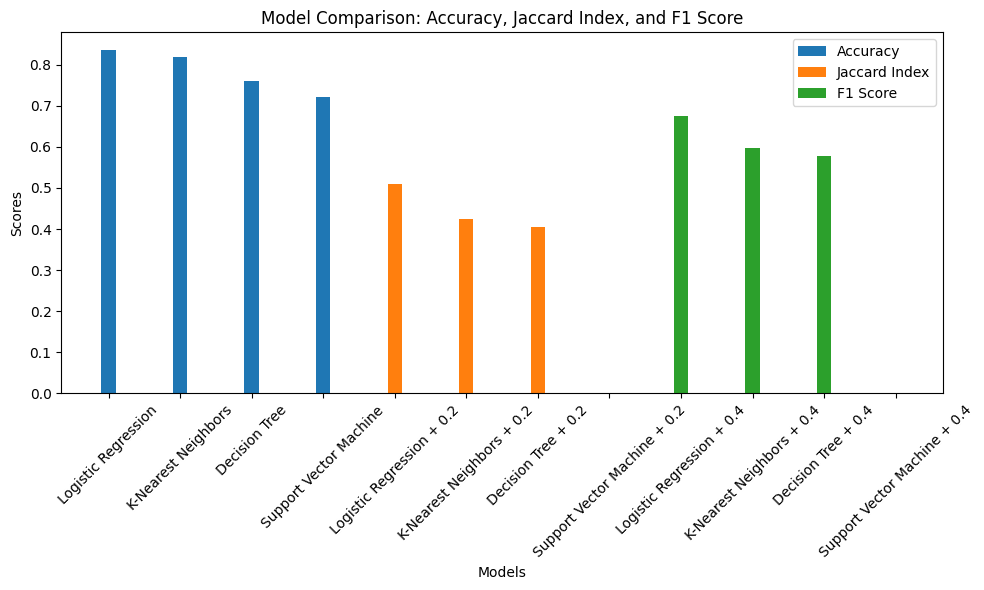

In [22]:
import matplotlib.pyplot as plt
models = ['Logistic Regression', 'K-Nearest Neighbors', 'Decision Tree', 'Support Vector Machine']
accuracy_scores = [LR_Accuracy_Score, KNN_Accuracy_Score, Tree_Accuracy_Score, SVM_Accuracy_Score]
jaccard_scores = [LR_JaccardIndex, KNN_JaccardIndex, Tree_JaccardIndex, SVM_JaccardIndex]
f1_scores = [LR_F1_Score, KNN_F1_Score, Tree_F1_Score, SVM_F1_Score]
plt.figure(figsize=(10, 6))
plt.bar(models, accuracy_scores, width=0.2, label='Accuracy')
plt.bar([str(x) + ' + 0.2' for x in models], jaccard_scores, width=0.2, label='Jaccard Index')
plt.bar([str(x) + ' + 0.4' for x in models], f1_scores, width=0.2, label='F1 Score')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Comparison: Accuracy, Jaccard Index, and F1 Score')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

###Conclusion



<p>This analysis is part of a peer assignment from the Coursera course, <i>"Machine Learning with Python."</i></p>
<p>The task involved exploring weather data, preprocessing it through one-hot encoding and binary replacement, and training various machine learning models like Logistic Regression, K-Nearest Neighbors (KNN), Decision Tree Classifier, and Support Vector Machine (SVM).</p>
<p>Evaluation metrics such as Accuracy Score, Jaccard Index, F1 Score, and Log Loss were computed to assess the models' performance on the test data.</p>
<p>The completion of this assignment demonstrates a practical understanding of Machine Learning concepts and their implementation in Python.</p>